# Overview

**Data:** We have information on 5,000 bank customers, including their age, income, accounts, and whether they took out a personal loan last year.

**Problem:** The bank wants to find ways to get more customers to take out personal loans without losing them as regular customers. They had a 9.6% success rate last year and want to improve it.

**Goal:** Use customer data to identify the best people to offer personal loans to, so the bank can spend less money and get more loans.

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files


In [2]:
files.upload()

Saving Bank_Personal_Loan_Modelling.xlsx to Bank_Personal_Loan_Modelling.xlsx


{'Bank_Personal_Loan_Modelling.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00\x12\x18\xde\xddd\x01\x00\x00\x18\x05\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x0

In [3]:
df=pd.read_excel("Bank_Personal_Loan_Modelling.xlsx", 1)
df

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
#Checking for null values in the data
df.isnull().sum()

,0
ID,0
Age,0
Experience,0
Income,0
ZIP Code,0
Family,0
CCAvg,0
Education,0
Mortgage,0
Personal Loan,0


In [6]:
#Dropping irrelevant columns
#axis = 1 checks row wise and axis = 1 checks column wise
df.drop(['ID', 'ZIP Code'], axis=1, inplace=True)

In [7]:
#Starting EDA
import plotly.express as px

In [8]:
fig = px.box(df, y= ['Age', 'Experience', 'Income', 'Family', 'Education'])
fig.show()

**Analysis of Box Plot**

*Age*

According to the Plot

*   Anyone above 67 (max) does not qualify as a personal loan prospect because they usually retire at this age and do not require such banking products.
*   Anyone below age 23 (min) does not qualify as a personal loan prospect because they might not be able to fit the eligibility criteria due to education, less income or similar reasons.

`Similar inferences can be made about all the variables listed. `

In [9]:
df.dtypes

,0
Age,int64
Experience,int64
Income,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64
Securities Account,int64
CD Account,int64


In [10]:
df.skew()

,0
Age,-0.029341
Experience,-0.026325
Income,0.841339
Family,0.155221
CCAvg,1.598457
Education,0.227093
Mortgage,2.104002
Personal Loan,2.743607
Securities Account,2.588268
CD Account,3.691714


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Experience'}>,
        <Axes: title={'center': 'Income'}>],
       [<Axes: title={'center': 'Family'}>,
        <Axes: title={'center': 'CCAvg'}>,
        <Axes: title={'center': 'Education'}>],
       [<Axes: title={'center': 'Mortgage'}>,
        <Axes: title={'center': 'Personal Loan'}>,
        <Axes: title={'center': 'Securities Account'}>],
       [<Axes: title={'center': 'CD Account'}>,
        <Axes: title={'center': 'Online'}>,
        <Axes: title={'center': 'CreditCard'}>]], dtype=object)

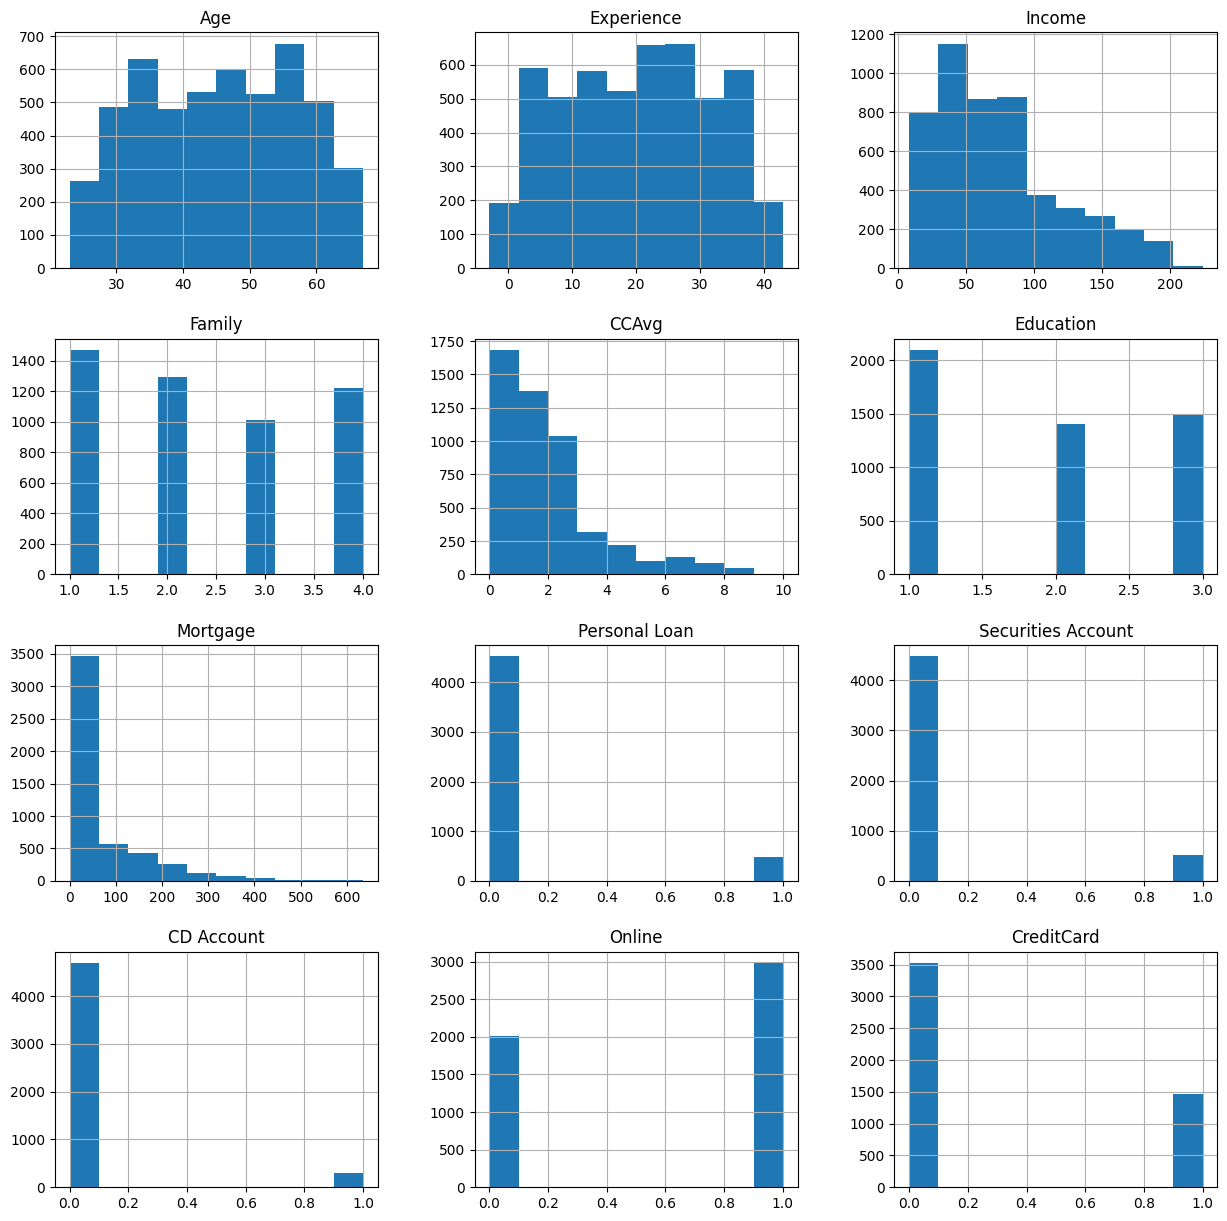

In [11]:
df.hist(figsize=(15,15))

<ipython-input-12-e2f65d39c0be>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Experience', ylabel='Density'>

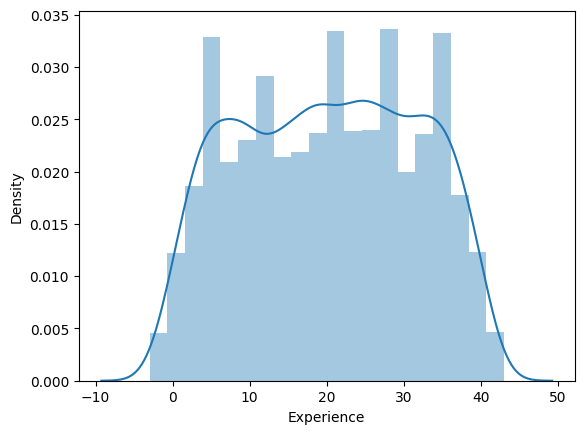

In [12]:
#Since the experience is negative that means that we need to work on this data. We will visualize this data first then sort it
sns.distplot(df['Experience'])

In [13]:
df['Experience'].mean()

20.1046

In [14]:
#Checking negative data
neg_exp = df[df['Experience']<0]
neg_exp.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
89,25,-1,113,4,2.30,3,0,0,0,0,0,1
226,24,-1,39,2,1.70,2,0,0,0,0,0,0
315,24,-2,51,3,0.30,3,0,0,0,0,1,0
451,28,-2,48,2,1.75,3,89,0,0,0,1,0
524,24,-1,75,4,0.20,1,0,0,0,0,1,0


In [15]:
neg_exp.shape

(52, 12)

<ipython-input-16-b7f02e7bddac>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




<Axes: xlabel='Age', ylabel='Density'>

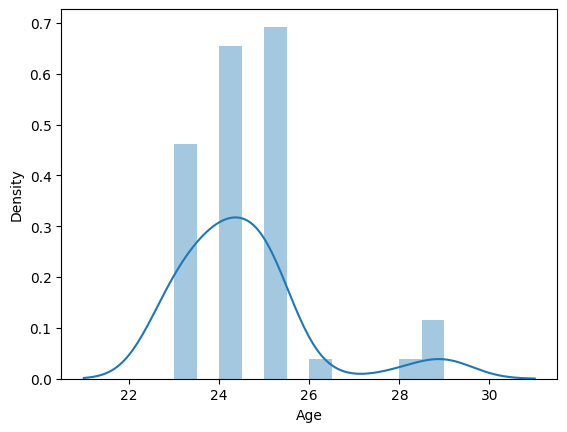

In [16]:
sns.distplot(neg_exp['Age'])

In [17]:
neg_exp['Experience'].mean()

-1.4423076923076923

In [18]:
neg_exp.size

624

In [19]:
print('There are {} records which has negative values for experience, approx {} %'.format(neg_exp.size ,
                                ((neg_exp.size/df.size)*100)))

There are 624 records which has negative values for experience, approx 1.04 %


In [20]:
data = df.copy()

In [21]:
data['Experience'] = np.where(data['Experience']<0, data['Experience'].mean(), data['Experience'])

In [22]:
data[data['Experience']<0]

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard


In [23]:
data.corr()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,0.977008,-0.055269,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,0.977008,1.000000,-0.049054,-0.045488,-0.048719,0.018097,-0.013378,-0.014045,-0.000462,0.005502,0.013455,0.008833
Income,-0.055269,-0.049054,1.000000,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
Family,-0.046418,-0.045488,-0.157501,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052030,-0.048719,0.645993,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.041334,0.018097,-0.187524,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,-0.013378,0.206806,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,-0.014045,0.502462,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.000462,-0.002616,0.019994,0.015087,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.005502,0.169738,0.014110,0.136537,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


<Axes: >

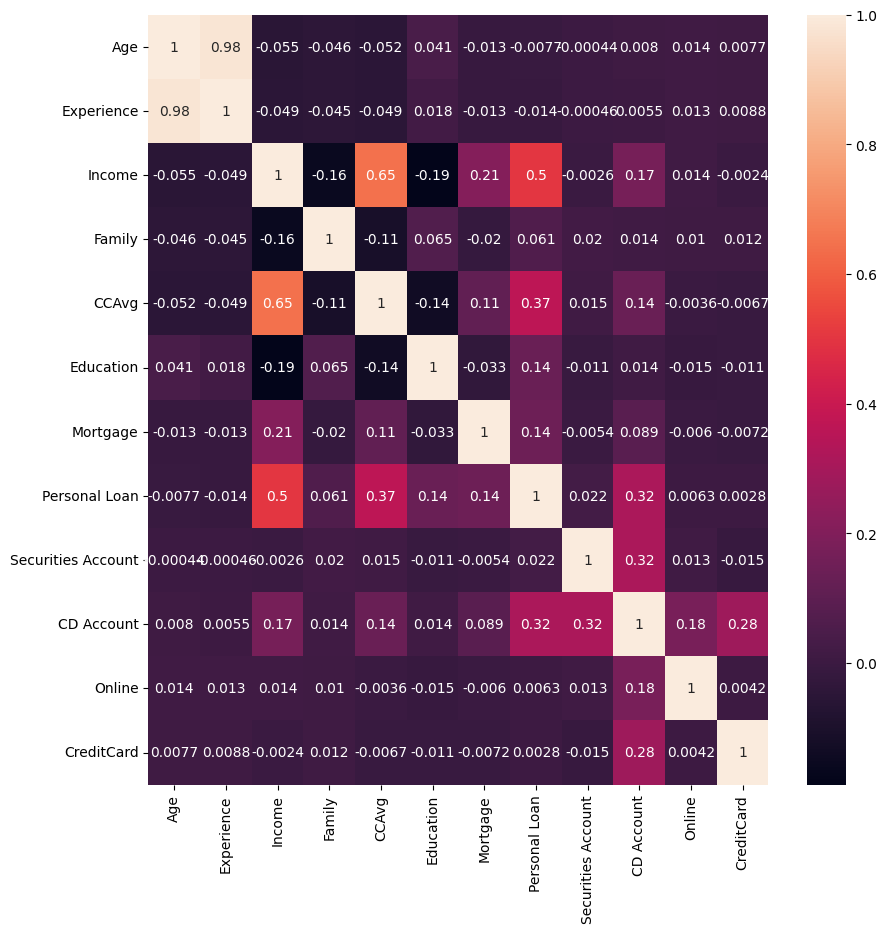

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(), annot=True)

In [25]:
# There is a high correlation between Age and Experience so we will be dropping experience
# Reason for choosing experience is that Age can be a relevant variable with others for analysis moving forward

data =  data.drop(['Experience'], axis=1)

In [26]:
def experience(x):
  if x==1:
    return "undergraduate"
  elif x==2:
    return "graduate"
  elif x==3:
    return "professional"

In [27]:
data['edu']=  data['Education'].apply(experience)

In [28]:
data['edu'].unique()

array(['undergraduate', 'graduate', 'professional'], dtype=object)

In [29]:
education_dis = data.groupby('edu')['Age'].count()

In [30]:
education_dis

,Age
edu,
graduate,1403
professional,1501
undergraduate,2096


In [31]:
fig = px.pie(data, values = education_dis, names=education_dis.index, title='Education Distribution')
fig.show()

In [32]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'edu'],
      dtype='object')

In [33]:
data['Income'].unique()

array([ 49,  34,  11, 100,  45,  29,  72,  22,  81, 180, 105, 114,  40,
       112, 130, 193,  21,  25,  63,  62,  43, 152,  83, 158,  48, 119,
        35,  41,  18,  50, 121,  71, 141,  80,  84,  60, 132, 104,  52,
       194,   8, 131, 190,  44, 139,  93, 188,  39, 125,  32,  20, 115,
        69,  85, 135,  12, 133,  19,  82, 109,  42,  78,  51, 113, 118,
        64, 161,  94,  15,  74,  30,  38,   9,  92,  61,  73,  70, 149,
        98, 128,  31,  58,  54, 124, 163,  24,  79, 134,  23,  13, 138,
       171, 168,  65,  10, 148, 159, 169, 144, 165,  59,  68,  91, 172,
        55, 155,  53,  89,  28,  75, 170, 120,  99, 111,  33, 129, 122,
       150, 195, 110, 101, 191, 140, 153, 173, 174,  90, 179, 145, 200,
       183, 182,  88, 160, 205, 164,  14, 175, 103, 108, 185, 204, 154,
       102, 192, 202, 162, 142,  95, 184, 181, 143, 123, 178, 198, 201,
       203, 189, 151, 199, 224, 218])

In [34]:
def security (y):
 if(y['Securities Account']==1) & (y['CD Account']==1):
  return "Holds Securities and CD"
 elif(y['Securities Account']==0) & (y['CD Account']==0):
  return "Holds None"
 elif(y['Securities Account']==1) & (y['CD Account']==0):
  return "Holds Securities"
 elif(y['Securities Account']==0) & (y['CD Account']==1):
  return "Holds CD"


In [35]:
data['account_type'] = data.apply(security, axis=1)

In [36]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu,account_type
0,25,49,4,1.6,1,0,0,1,0,0,0,undergraduate,Holds Securities
1,45,34,3,1.5,1,0,0,1,0,0,0,undergraduate,Holds Securities
2,39,11,1,1.0,1,0,0,0,0,0,0,undergraduate,Holds None
3,35,100,1,2.7,2,0,0,0,0,0,0,graduate,Holds None
4,35,45,4,1.0,2,0,0,0,0,0,1,graduate,Holds None


In [37]:
values = data['account_type'].value_counts()
values.index

Index(['Holds None', 'Holds Securities', 'Holds CD',
       'Holds Securities and CD'],
      dtype='object', name='account_type')

In [38]:
fig = px.pie(data, values=values.values, names=values.index, title='Account Distribution')
fig.show()

In [39]:
px.box(data, x = 'Education', y='Income', facet_col= 'Personal Loan')

We can see that for people who haven't taken. personal loan (=0), what is their income with respect to education level and we can decide accordingly how to target them.

<ipython-input-40-f78a54ec03ed>:1: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-40-f78a54ec03ed>:3: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




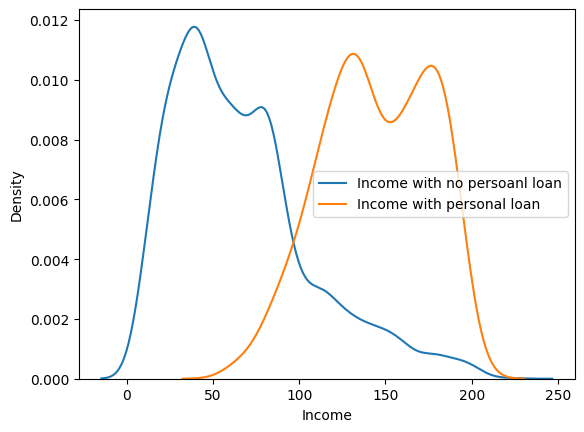

In [40]:
sns.distplot(data[data['Personal Loan'] == 0]['Income'], hist = False,
            label = "Income with no persoanl loan")
sns.distplot(data[data['Personal Loan'] == 1]['Income'], hist = False,
            label = "Income with personal loan")
plt.legend()

In [41]:
def plot(col1, col2, lable1, lable2, title):
    sns.distplot(data[data[col2] == 0][col1], hist = False,
            label =lable1)

    sns.distplot(data[data[col2] == 1][col1], hist = False,
            label = lable2)

    plt.legend()
    plt.title(title)

<ipython-input-41-01aaa210870b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-41-01aaa210870b>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




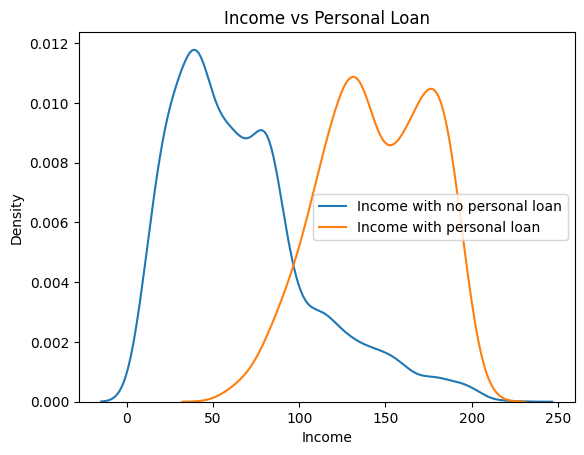

In [42]:
plot('Income', 'Personal Loan', 'Income with no personal loan', 'Income with personal loan', 'Income vs Personal Loan')

<ipython-input-41-01aaa210870b>:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-41-01aaa210870b>:5: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




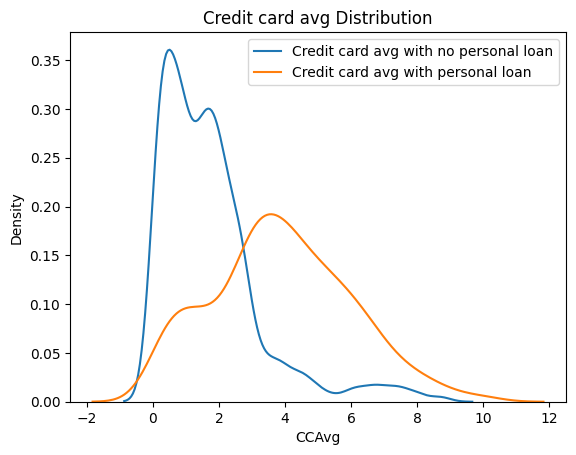

In [43]:
plot('CCAvg','Personal Loan',
     'Credit card avg with no personal loan',
     'Credit card avg with personal loan',
     'Credit card avg Distribution')

In [44]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'edu', 'account_type'],
      dtype='object')

In [45]:
col = ['Securities Account', 'Online', 'CreditCard', 'account_type']

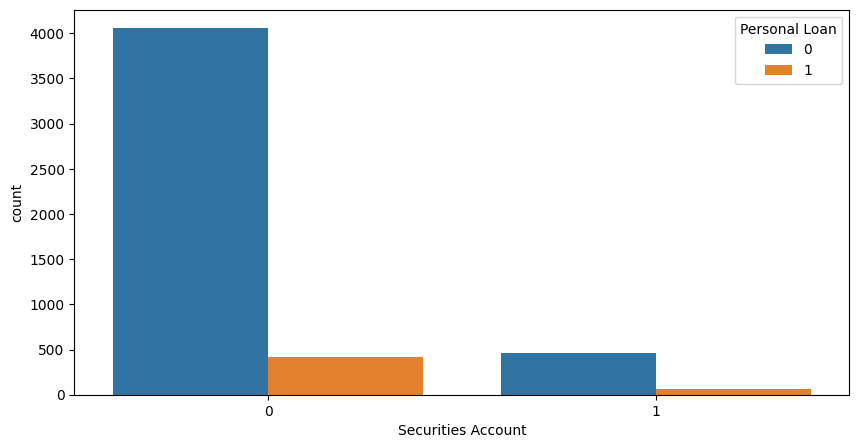

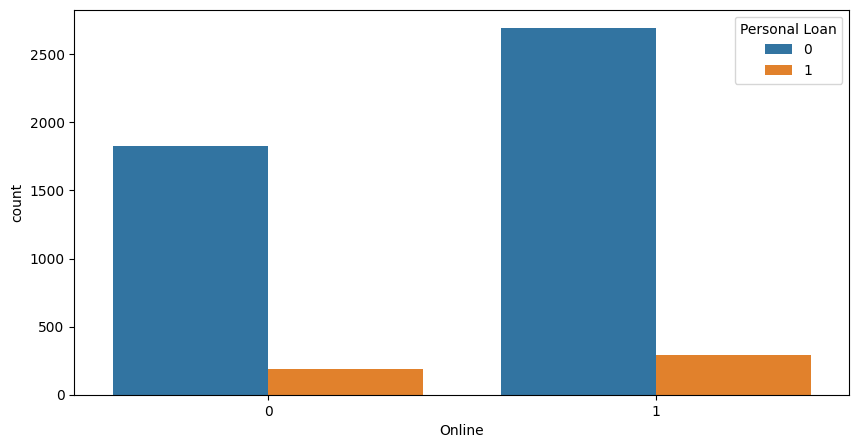

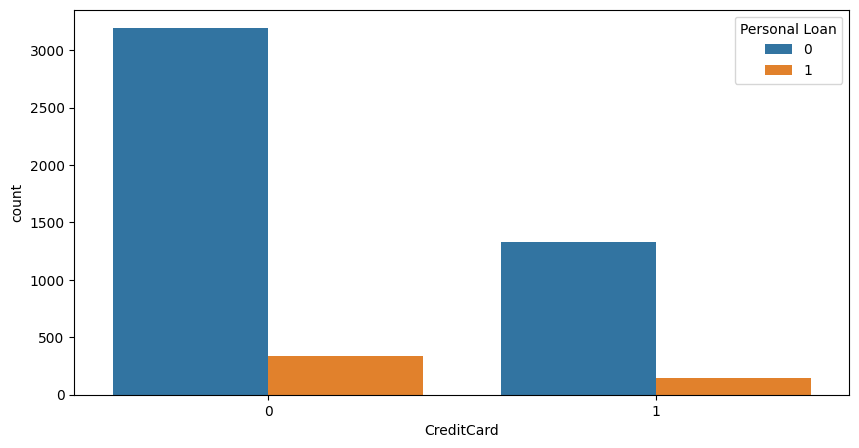

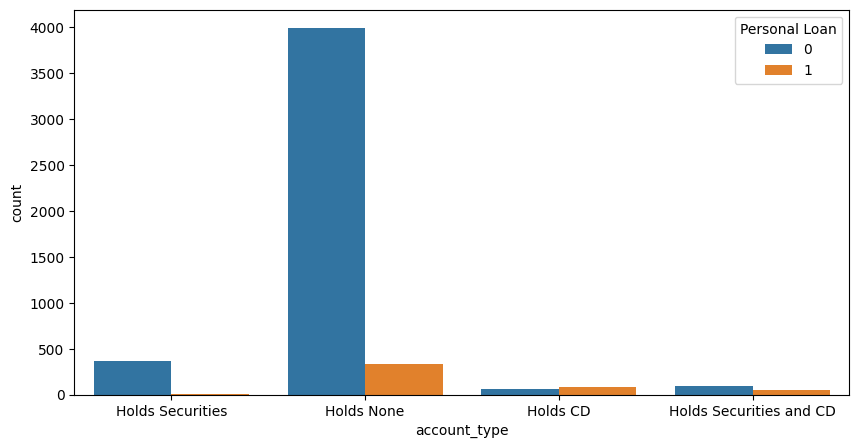

In [46]:
for i in col:
  plt.figure(figsize=(10,5))
  sns.countplot(x=i, data=data, hue = 'Personal Loan')

There seems to be skewness in the data so it needs to be handled first

In [47]:
from scipy.stats import zscore

In [48]:
#IQR Method to manage skewness in data

numeric_data = data.select_dtypes(include='number')
q1 = numeric_data.quantile(0.25)
q3 = numeric_data.quantile(0.75)

iqr = q3-q1
print(iqr)

Age                    20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


In [49]:
#Log Normal Method to manage skewness in data

data_1 = data[['Income', 'CCAvg']]
data_1 = np.log(data_1+1)
data_1


,Income,CCAvg
0,3.912023,0.955511
1,3.555348,0.916291
2,2.484907,0.693147
3,4.615121,1.308333
4,3.828641,0.693147
...,...,...
4995,3.713572,1.064711
4996,2.772589,0.336472
4997,3.218876,0.262364
4998,3.912023,0.405465


In [50]:
#Power Transformation Method
from sklearn.preprocessing import PowerTransformer

<ipython-input-51-756b1dd18760>:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




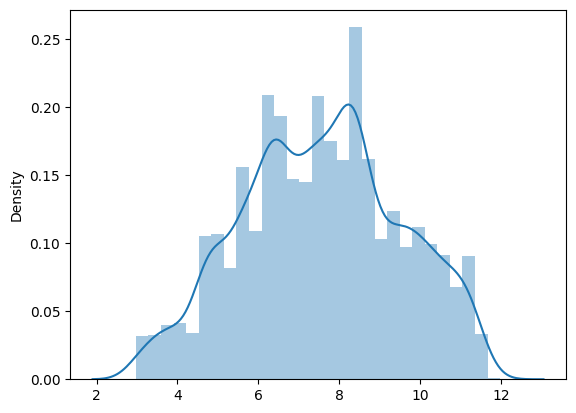

In [51]:
pt = PowerTransformer(method='yeo-johnson', standardize=False)
pt.fit(data['Income'].values.reshape(-1,1))
Income = pt.transform(data['Income'].values.reshape(-1,1))
sns.distplot(Income)
plt.show()

#Predictive Analytics

We will be using logistic regression as we are checking for personal loans and it is a binary variable

In [52]:
   from sklearn.model_selection import train_test_split
   from sklearn.linear_model import LogisticRegression
   from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [53]:
   from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [54]:
data.columns

Index(['Age', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account', 'Online',
       'CreditCard', 'edu', 'account_type'],
      dtype='object')

In [55]:
data.dtypes

,0
Age,int64
Income,int64
Family,int64
CCAvg,float64
Education,int64
Mortgage,int64
Personal Loan,int64
Securities Account,int64
CD Account,int64
Online,int64


In [56]:
data.head()

,Age,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard,edu,account_type
0,25,49,4,1.6,1,0,0,1,0,0,0,undergraduate,Holds Securities
1,45,34,3,1.5,1,0,0,1,0,0,0,undergraduate,Holds Securities
2,39,11,1,1.0,1,0,0,0,0,0,0,undergraduate,Holds None
3,35,100,1,2.7,2,0,0,0,0,0,0,graduate,Holds None
4,35,45,4,1.0,2,0,0,0,0,0,1,graduate,Holds None


In [59]:
pred_data = data.copy()
pred_data = pred_data.iloc[:, :-3]

In [60]:

   X = pred_data.drop('Personal Loan', axis=1)
   y = pred_data['Personal Loan']

   X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
   model = LogisticRegression(penalty='l2', C=1.0, max_iter=1000, random_state=42)
   model.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [62]:
   y_pred = model.predict(X_test)
   y_pred_proba = model.predict_proba(X_test)[:, 1]

   print("Accuracy:", accuracy_score(y_test, y_pred))
   print("Precision:", precision_score(y_test, y_pred))
   print("Recall:", recall_score(y_test, y_pred))
   print("ROC AUC:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.953
Precision: 0.8918918918918919
Recall: 0.6285714285714286
ROC AUC: 0.9686299547752062


In [63]:
   from sklearn.model_selection import cross_val_score

   cv_scores = cross_val_score(model, X, y, cv=10, scoring='roc_auc')


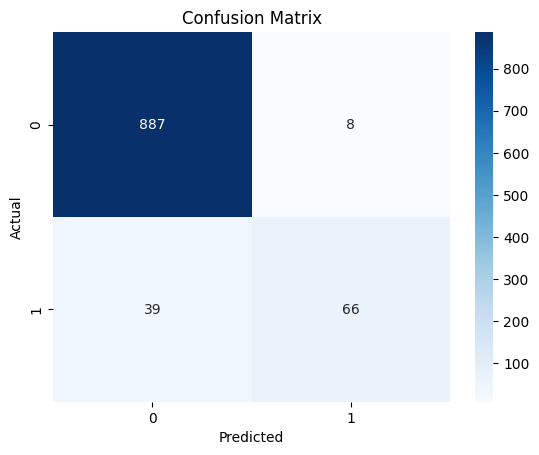

In [64]:
#Visualizing the model to show the summary of prediction results

from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [65]:
   print("Cross-Validation AUC Scores:", cv_scores)
   print("Mean AUC Score:", cv_scores.mean())

Cross-Validation AUC Scores: [0.95436947 0.95188053 0.93118547 0.94026549 0.96524705 0.95713496
 0.97110066 0.96086836 0.97663164 0.94985251]
Mean AUC Score: 0.9558536135693215


In [66]:
   from sklearn.model_selection import GridSearchCV

   param_grid = {
       'C': [0.01, 0.1, 1, 10, 100],
       'penalty': ['l1', 'l2']
   }

   grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='roc_auc')
   grid_search.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/u

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=42),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']},
             scoring='roc_auc')

In [67]:
  print("Best Parameters:", grid_search.best_params_)
  print("Best AUC Score:", grid_search.best_score_)

Best Parameters: {'C': 100, 'penalty': 'l2'}
Best AUC Score: 0.951168735632184
